In [3]:
# main_data_dir = 'Dataset_BUSI_with_GT'
# overlayed_image_dir = 'OverlayedImages'
overlayed_image_dir = 'Dataset_BUSI_with_GT'
increased_image_dir = 'IncreasedImages'
labels = ['benign', 'malignant', 'normal']

In [2]:
import os
from PIL import Image 
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np

for label in labels:
    os.makedirs(os.path.join(overlayed_image_dir, label), exist_ok=True)
for label in labels:
    label_dir = os.path.join(main_data_dir, label)
    for image_file in os.listdir(label_dir):
        if image_file.endswith(').png'):
            image_path = os.path.join(label_dir, image_file)
            mask_file = image_file.replace('.png', '_mask.png')
            mask_path = os.path.join(label_dir, mask_file)
            image = Image.open(image_path)
            mask = Image.open(mask_path)
            if image.mode != mask.mode:
                mask = mask.convert(image.mode)
            if image.size != mask.size:
                image = image.resize(mask.size)
            overlayed = Image.blend(image, mask, alpha=0.5)
            for i in range(1,3):
                mask_file = image_file.replace('.png', f'_mask_{i}.png')
                mask_path = os.path.join(label_dir, mask_file)
                if os.path.exists(mask_path):
                    mask = Image.open(mask_path)
                    if image.mode != mask.mode:
                        mask = mask.convert(image.mode)
                    if image.size != mask.size:
                        image = image.resize(mask.size)
                    overlayed = Image.blend(overlayed, mask, alpha=0.25)
            output_path = os.path.join(overlayed_image_dir, label, os.path.basename(image_path))
            overlayed.save(output_path)

In [3]:
# input_counts = {}
output_counts = {}

def count_files_in_directory(directory):
    return sum(len(files) for _, _, files in os.walk(directory))


# for label in os.listdir(main_data_dir):
#     label_dir = os.path.join(main_data_dir, label)
#     if os.path.isdir(label_dir):
#         input_counts[label] = count_files_in_directory(label_dir)
        
for label in os.listdir(overlayed_image_dir):
    label_dir = os.path.join(overlayed_image_dir, label)
    if os.path.isdir(label_dir):
        output_counts[label] = count_files_in_directory(label_dir)

        
# print("File Counts Before Overlay-includes masks:")
# for label, count in input_counts.items():
#     print(f"{label}: {count} files")

print("\nFile Counts After Overlay:")
for label, count in output_counts.items():
    print(f"{label}: {count} files")


File Counts After Overlay:
benign: 891 files
malignant: 421 files
normal: 266 files


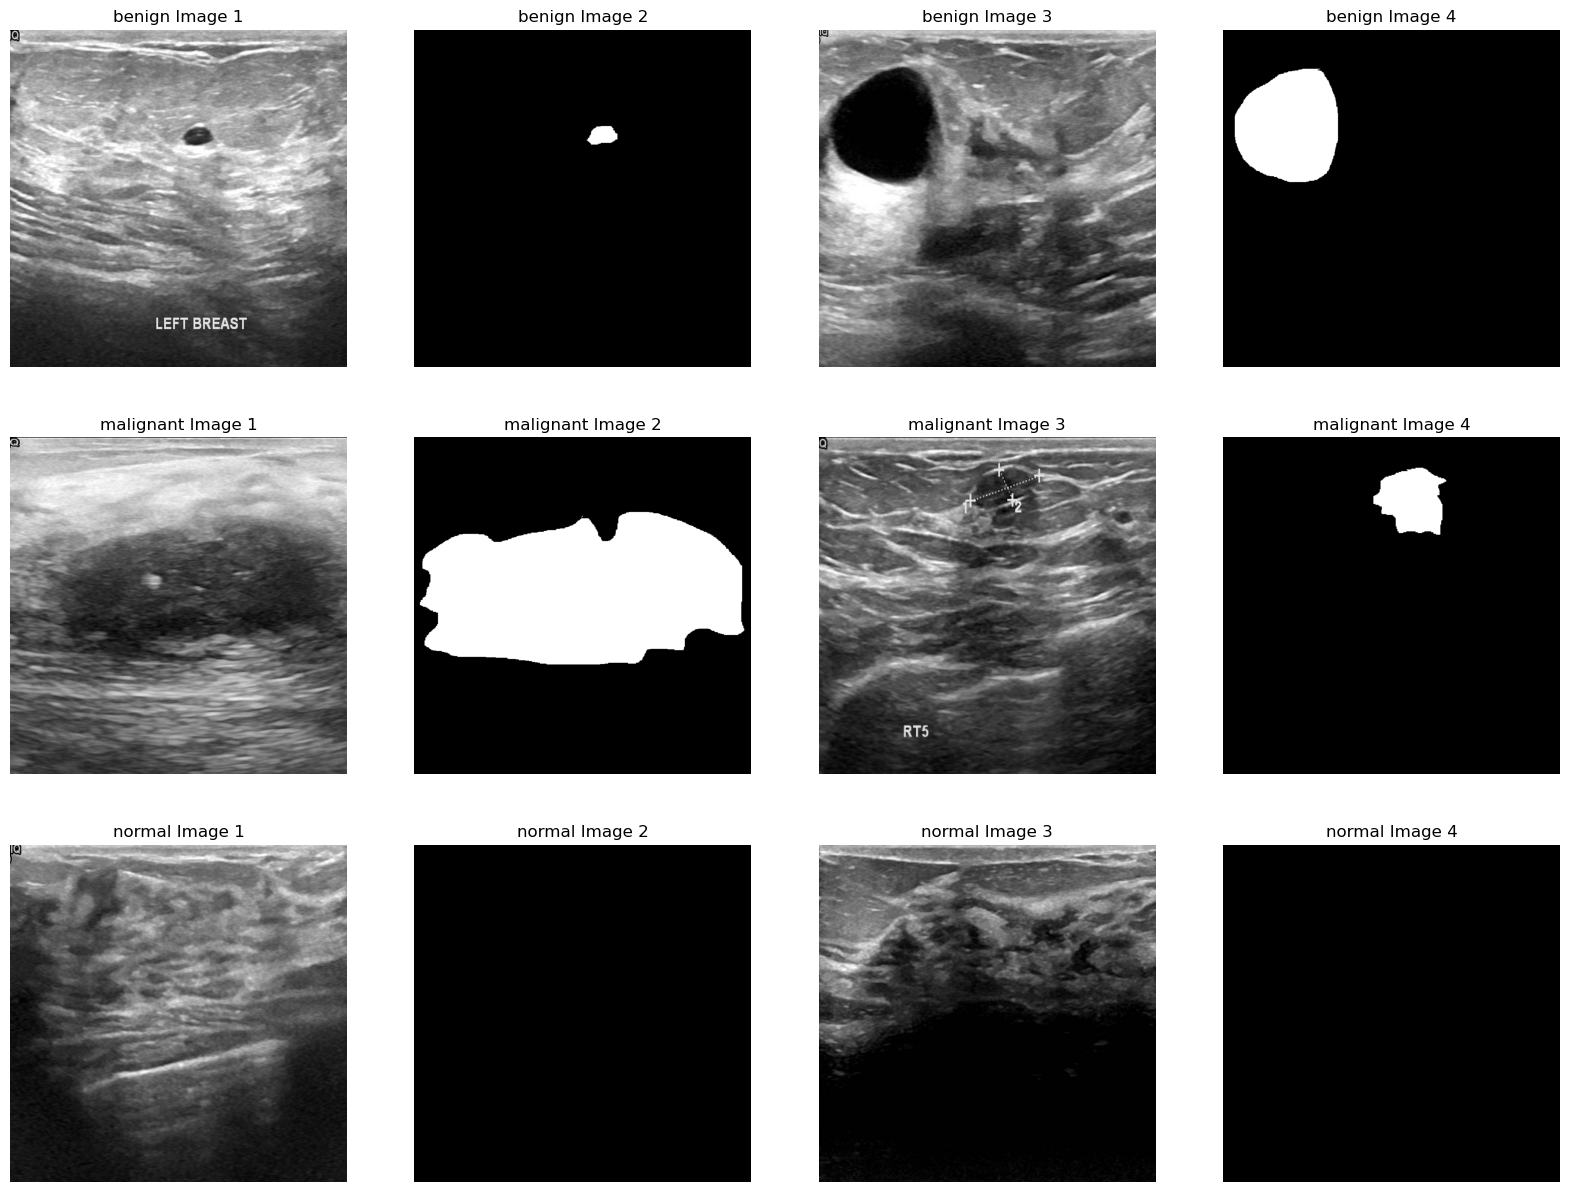

In [4]:
label_dirs = [os.path.join(overlayed_image_dir, label) for label in labels]


fig, axs = plt.subplots(3, 4, figsize=(20, 15))


desired_width = 800  
desired_height = 800  

for i, label_dir in enumerate(label_dirs):
    images = [image for image in os.listdir(label_dir) if image.endswith('.png')]
    for j, image_filename in enumerate(images[:4]):
        image_path = os.path.join(label_dir, image_filename)
        image = Image.open(image_path)
        image = image.resize((desired_width, desired_height), Image.LANCZOS)
        axs[i, j].imshow(image)
        axs[i, j].set_title(f'{labels[i]} Image {j + 1}')
        axs[i, j].axis('off')

plt.show()

In [5]:
# Define augmentation parameters
vertical_flip = True
horizontal_flip = True
rotation_range = (-20, 20)
shift_height_range = (-0.2, 0.2)  # Shift range for height
shift_width_range = (-0.2, 0.2)   # Shift range for width

# Function to perform data augmentation
def augment_image(image):
    augmented_images = []

    # Original image
    augmented_images.append(image)

    # Vertical flip
    if vertical_flip:
        augmented_images.append(cv2.flip(image, 0))

    # Horizontal flip
    if horizontal_flip:
        augmented_images.append(cv2.flip(image, 1))

    # Rotation
    if rotation_range:
        for _ in range(2):  # Generate 2 rotated images
            angle = random.uniform(rotation_range[0], rotation_range[1])
            rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
            rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]),borderMode=cv2.BORDER_REFLECT)
            augmented_images.append(rotated_image)

    return augmented_images


# Main loop for data augmentation
for label in labels:
    os.makedirs(os.path.join(increased_image_dir, label), exist_ok=True)
    c=0
    label_dir = os.path.join(overlayed_image_dir, label)
    for image_file in os.listdir(label_dir):
        #####################################################
        if image_file.endswith(').png') and c<133:
            c+=1
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)

            augmented_images = augment_image(image)

            for i, augmented_image in enumerate(augmented_images):
                output_path = os.path.join(increased_image_dir, label, f"{os.path.splitext(image_file)[0]}_({i}).png")
                cv2.imwrite(output_path, augmented_image)


In [4]:
input_counts = {}
output_counts = {}

def count_files_in_directory(directory):
    return sum(len(files) for _, _, files in os.walk(directory))


for label in os.listdir(increased_image_dir):
    label_dir = os.path.join(increased_image_dir, label)
    if os.path.isdir(label_dir):
        output_counts[label] = count_files_in_directory(label_dir)

        


print("\nFile Counts After augmentation:")
for label, count in output_counts.items():
    print(f"{label}: {count} files")


File Counts After augmentation:
benign: 665 files
malignant: 665 files
normal: 665 files
